In [1]:
import pandas as pd

In [54]:
df_atencion = pd.read_csv('tiempos de atencion.csv',)

In [55]:
df_atencion.sample(4)

,"@timestamp,""http_duration"""
1277,"Sep 18, 2024 @ 17:21:37.349,16174"
2071,"Sep 18, 2024 @ 17:21:19.326,557"
76,"Sep 18, 2024 @ 17:22:44.113,388"
2330,"Sep 18, 2024 @ 17:21:12.540,21"


In [56]:
df_atencion['http_duration'] = df_atencion['@timestamp,"http_duration"'].str.split(',').map(lambda x: x[-1]).astype(int)

In [57]:
df_atencion.http_duration.sample(3)

2805    1234
570      430
207      317
Name: http_duration, dtype: int32

In [90]:
df_atencion[df_atencion.http_duration < 1000].sample(3)

,"@timestamp,""http_duration""",http_duration
1954,"Sep 18, 2024 @ 17:21:22.420,525",525
667,"Sep 18, 2024 @ 17:21:57.538,951",951
1594,"Sep 18, 2024 @ 17:21:29.998,278",278


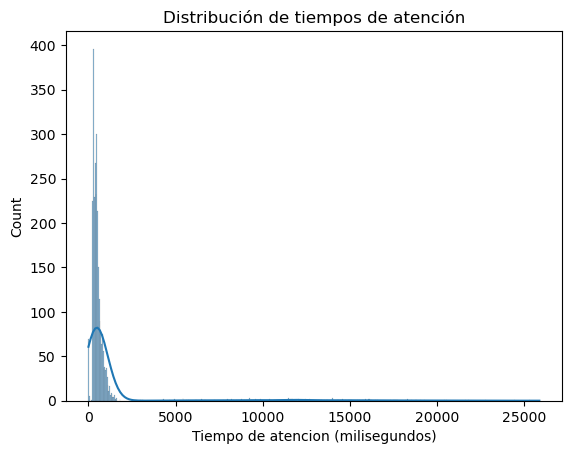

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la distribución
sns.histplot(df_atencion['http_duration'], kde=True)
plt.xlabel('Tiempo de atencion (milisegundos)')
plt.title('Distribución de tiempos de atención')
plt.show()

In [59]:
#Importamos fitter
from fitter import Fitter

In [60]:
f = Fitter(df_atencion.http_duration)
f.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
genhyperbolic,2.258448e-08,2781.715221,2811.745392,inf,0.060400,5.934035e-10
skewcauchy,4.155782e-08,2710.763463,2728.781566,inf,0.052563,1.215840e-07
johnsonsu,1.181641e-07,2728.002613,2752.026750,inf,0.079970,3.949375e-17
cauchy,1.373379e-07,2894.032860,2906.044928,inf,0.180687,3.820925e-86
t,1.376994e-07,2889.720558,2907.738661,inf,0.181151,1.376439e-86
tukeylambda,1.420481e-07,2889.641612,2907.659715,inf,0.184733,4.691273e-90
norminvgauss,2.289635e-07,2619.766509,2643.790646,inf,0.066951,3.932402e-12
burr12,2.295771e-07,2909.287521,2933.311658,inf,0.113564,3.789101e-34
foldcauchy,2.360579e-07,2768.416132,2786.434235,inf,0.130532,5.166586e-45
dweibull,2.739711e-07,3087.081553,3105.099656,inf,0.236604,3.518739e-148


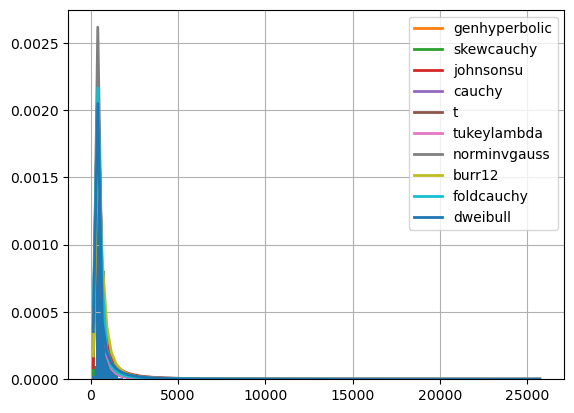

In [91]:
f.summary(10)

In [92]:
# Obtengo los parámetros de la mejor fdp
f.get_best(method='sumsquare_error')

{'genhyperbolic': {'p': -1.2013473124553011,
  'a': 1.8163181809574367,
  'b': 1.8163181809574356,
  'loc': 275.05572981182365,
  'scale': 188.90036583768813}}

In [31]:
p = -1.2013473124553011
a = 1.8163181809574367
b = 1.8163181809574356
loc = 275.05572981182365,
scale = 188.90036583768813

In [93]:
from scipy import stats

f_verif = stats.genhyperbolic.rvs(p=p, a=a, b=b, loc=loc, scale=scale, size=3000, random_state=None)

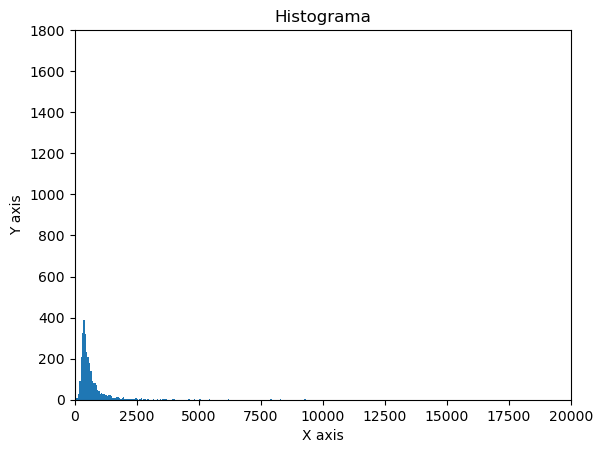

In [94]:
# Histograma de datos de verificación
plt.title("Histograma")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.xlim(0, 20000)
plt.ylim(0, 1800)
plt.hist(f_verif, bins=1000)
plt.show()

In [95]:
v = Fitter(f_verif)
v.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gengamma,1.475322e-08,5764.201001,5788.226472,inf,0.139405,2.531480e-51
lognorm,2.228921e-08,5060.628891,5078.647994,inf,0.118722,2.662161e-37
johnsonsb,2.408234e-08,5164.416534,5188.442004,inf,0.115357,3.098443e-35
invgauss,2.434076e-08,6592.765602,6610.784705,inf,0.167629,3.735790e-74
fatiguelife,2.445006e-08,8114.145320,8132.164423,inf,0.188749,4.672511e-94
genhyperbolic,2.491814e-08,3174.443031,3204.474869,inf,0.008651,9.768658e-01
exponweib,2.554095e-08,4960.129083,4984.154553,inf,0.093157,4.152932e-23
genexpon,2.638112e-08,11152.099418,11182.131256,inf,0.165015,7.368644e-72
recipinvgauss,2.782233e-08,8955.634221,8973.653324,inf,0.193904,2.768366e-99
exponnorm,2.870239e-08,10018.253692,10036.272795,inf,0.195193,1.296718e-100


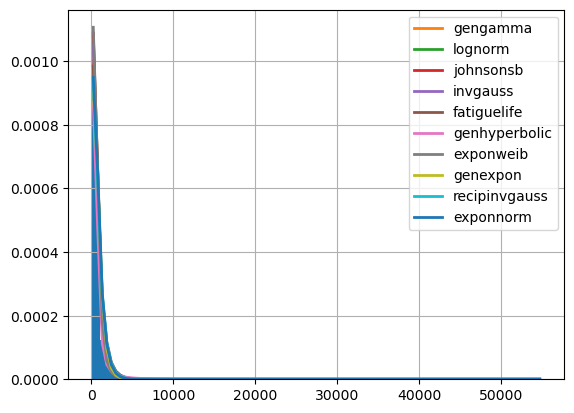

In [96]:
v.summary(10)